In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='AppleGothic')
import warnings
warnings.filterwarnings(action='ignore')

df_raw=pd.read_csv('../data/raw_data/train.csv')
df=df_raw.copy()

sample_submission_raw=pd.read_csv('../data/raw_data/sample_submission.csv')
sample_submission=sample_submission_raw.copy()

In [6]:
df['일시']=pd.to_datetime(df['일시'],format="%Y%m%d")
df.set_index('일시',inplace=True)

df['일'] = df.index.day
df['월'] = df.index.month
df['년'] = df.index.year
df['요일']=df.index.day_of_week
df['주']=df.index.week

df['주말평일'] = df['요일'].apply(lambda x: '평일' if x < 5 else '주말')

# --

sample_submission['일시']=pd.to_datetime(sample_submission['일시'],format="%Y%m%d")
sample_submission.set_index('일시',inplace=True)

sample_submission['일'] = sample_submission.index.day
sample_submission['월'] = sample_submission.index.month
sample_submission['년'] = sample_submission.index.year
sample_submission['요일']=sample_submission.index.day_of_week
sample_submission['주']=sample_submission.index.week

sample_submission['주말평일'] = sample_submission['요일'].apply(lambda x: '평일' if x < 5 else '주말')

sample_submission['주']=sample_submission['주'].apply(lambda x: 1 if x==52 else x)

In [7]:
from pytimekr import pytimekr
def get_holiday(_year):
    holidays=[]
    for holiday in pytimekr.holidays(year=_year):
        if pytimekr.red_days(holiday) != None:
            ans = [i.strftime("%Y-%m-%d") for i in pytimekr.red_days(holiday)]
            holidays.extend(ans)
        else:
            ans=holiday.strftime("%Y-%m-%d")
            holidays.append(ans)
    return list(set(holidays))

In [8]:
df.loc[get_holiday(2018),'주말평일'] = '주말'
df.loc[get_holiday(2019),'주말평일'] = '주말'
df.loc[get_holiday(2020),'주말평일'] = '주말'
df.loc[get_holiday(2021),'주말평일'] = '주말'
sample_submission.loc[sorted(get_holiday(2022))[:-1],'주말평일'] ='주말'

In [9]:
weekly_mean=df.groupby(['주','주말평일'])[df.columns[:4]].mean()
weekly_mean=weekly_mean.reset_index()

In [10]:
temp=pd.merge(sample_submission,weekly_mean,on=['주말평일','주'])

temp['date'] = temp['년'].apply(lambda x : str(x)) + temp['월'].apply(lambda x : '_'+str(x).zfill(2)) + temp['일'].apply(lambda x : '_'+str(x).zfill(2))
temp.index=pd.to_datetime(temp['date'],format='%Y_%m_%d')
temp.sort_index(inplace=True)

weekly_mean_ans=temp.copy()

In [11]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [12]:
weekly_mean_ans

,광진구_x,동대문구_x,성동구_x,중랑구_x,일,월,년,요일,주,주말평일,광진구_y,동대문구_y,성동구_y,중랑구_y,date
date,,,,,,,,,,,,,,,
2022-01-01,0,0,0,0,1,1,2022,5,1,주말,1.446364,0.970182,1.088364,0.676364,2022_01_01
2022-01-02,0,0,0,0,2,1,2022,6,1,주말,1.446364,0.970182,1.088364,0.676364,2022_01_02
2022-01-03,0,0,0,0,3,1,2022,0,1,평일,1.870000,1.318000,1.704118,0.848941,2022_01_03
2022-01-04,0,0,0,0,4,1,2022,1,1,평일,1.870000,1.318000,1.704118,0.848941,2022_01_04
2022-01-05,0,0,0,0,5,1,2022,2,1,평일,1.870000,1.318000,1.704118,0.848941,2022_01_05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-26,0,0,0,0,26,11,2022,5,47,주말,4.552000,3.189000,3.430500,2.415250,2022_11_26
2022-11-27,0,0,0,0,27,11,2022,6,47,주말,4.552000,3.189000,3.430500,2.415250,2022_11_27
2022-11-28,0,0,0,0,28,11,2022,0,48,평일,5.241100,3.899100,4.223800,2.664300,2022_11_28


In [120]:
for col in my.columns:
    my[col] = smooth(my[col],5)

In [121]:
my_18 = my.copy()

In [122]:
my_18.iloc[:,0]=my_18.iloc[:,0]*1.8
my_18.iloc[:,1]=my_18.iloc[:,1]*1.8
my_18.iloc[:,2]=my_18.iloc[:,2]*1.8
my_18.iloc[:,3]=my_18.iloc[:,3]*1.8

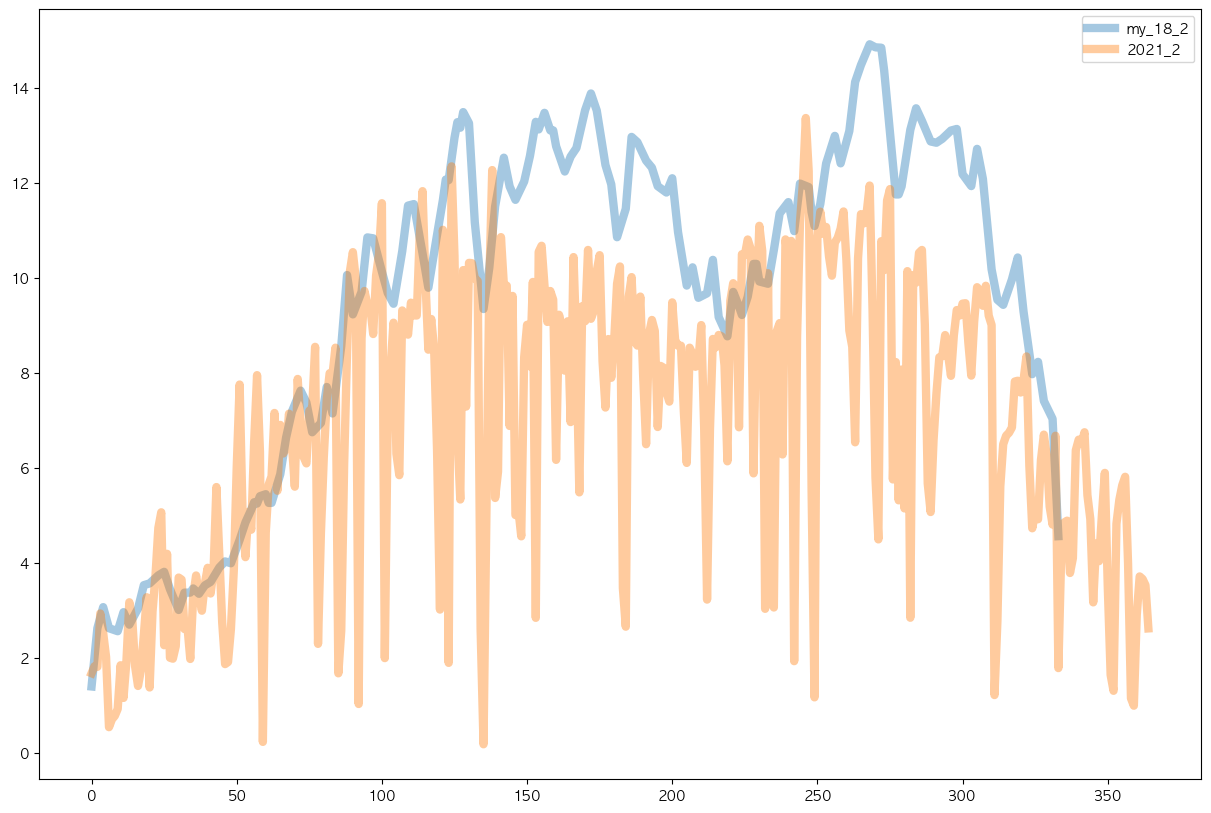

In [123]:
for i in [2]:
    my_18.reset_index(drop=True).iloc[:,i].plot(label = f'my_18_{i}',figsize=(15,10),alpha=0.4,lw=6)
    df_2021.reset_index(drop=True).iloc[:,i].plot(label = f'2021_{i}',figsize=(15,10),alpha=0.4,lw=6)

plt.legend()
plt.show()

In [97]:
for col in my_18.columns:
    my_18[col][10:-10] = smooth(my_18[col],5)[10:-10]

In [100]:
sample_submission_raw.iloc[:,1:] = my_18.values

In [101]:
sample_submission_raw.to_csv('based_on_weekly_mean18.csv',index=False)